# Worked solutions for week 1

In [1]:
#import relevant python packages
import pandas as pd
import math


### 2) Load the data and visualize using scatter

In [2]:
#load the training and test data (assuming it is in the same folder)
training_data = pd.read_csv("mixture.csv")

In [3]:
#let's have a look at the first few rows
training_data.head()

,X1,X2,Y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


Let's have a look at the data using a scatter plot. For the full set of features the user interface can be accessed here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

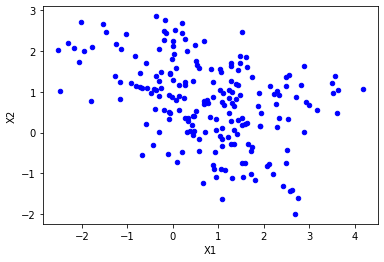

In [5]:
training_data.plot.scatter(x='X1', y='X2',c='blue')

In [6]:
#we need a color vector to highlight the different classes
col_vec = pd.Series(['blue'] * training_data.shape[0])

In [7]:
#set the color to 'orange' where Y is equal to 1
col_vec[training_data.Y==1] = 'orange'

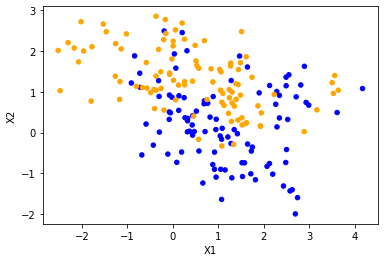

In [8]:
training_data.plot.scatter(x='X1', y='X2',c=col_vec)

### 3) Implement a 1-NN function

Let's write a function that provides a 1-NN prediction.

In [9]:
#train contains the entire data frame
#test is just the two coordinates X1 and X2 for one sample.
def OneNN(train, test):
    #set the minimum distance to something large
    min_dist = 999999
    #set the index to something negative
    my_idx = -1
    #we iterate over the entire training dataset and compute the euclidiean distance to each item
    for i in range(0, train.shape[0]):
        #compute distance
        my_dist=math.sqrt((train.iloc[i,0] - test[0])**2 + (train.iloc[i,1] - test[1])**2)
        #if the new distance is smaller than the smallest we have on record: update
        if my_dist < min_dist:
            my_idx = i
            min_dist = my_dist
    #return our prediction
    prediction = train.loc[my_idx,'Y']
    return(prediction)


### 4) Make predictions for the test set and visualize the result

In [10]:
#load the test data
test_data = pd.read_csv("mixture_test.csv")

In [11]:
#make predictions for each row in the test data
#have some patience, it is not really fast
my_predictions = []
for j in range(0, test_data.shape[0]):
    tmp = OneNN(training_data, test_data.iloc[j,:])
    my_predictions.append(tmp)

In [12]:
#create a color vector based on the predicted class
col_vec_test = pd.Series(['blue'] * test_data.shape[0])
col_vec_test[pd.Series(my_predictions) == 1] = 'orange'

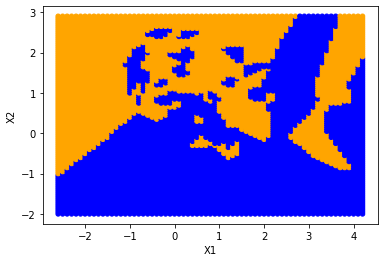

In [13]:
#use scatter to visualize
test_data.plot.scatter(x='X1',y='X2',c=col_vec_test)

### 5) Implement a K-NN classifier

In [14]:
#let's try to make this previous function a bit more general
#we can take advantage of the numpy package to clean the function a bit
import numpy as np

In [15]:

def OneNN_np(train, test):
    #clone the test vector so it has the same size as the train data
    test_mat = np.array([test,] * train.shape[0] )
    #subtract the test sample from all training samples
    diff_mat = train.iloc[:,0:2] - test_mat
    #we can actually skip the sqrt
    my_dist = np.sum(np.power(diff_mat, 2), axis=1)
    #my_dist contains now all distance measures
    #now we find the minimum index
    my_idx = pd.Series(my_dist).idxmin()
    prediction = train.loc[my_idx,'Y']
    return(prediction)

there are certainly more hacks to get it even faster. As you can see the 1-NN has nothing really to do
with 'learning'. Every time we make a prediction, we need to screen the entire training sample. For practical implementations sometims the trainig data are pre-organized so that this search is faster. 

In [16]:
#to make predictions for each row of the test set.
#instead of doing this in a for-loop we can use the apply function.
my_predictions_v2 = test_data.apply(lambda x: OneNN_np(training_data, x), axis=1)

In [17]:
#make another color vector, so we can check we get the same predictions
col_vec_test_v2 = pd.Series(['blue'] * test_data.shape[0])
col_vec_test_v2[pd.Series(my_predictions_v2) == 1] = 'orange'

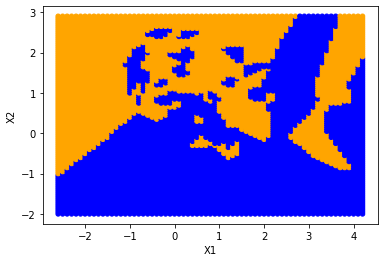

In [18]:
#plot the result
test_data.plot.scatter(x='X1',y='X2',c=col_vec_test_v2)

This last version makes it easier to implement a version with a flexible number of neighbors.
The idea is that we sort the distance vector 'my_dist' and store the indices of the corresponding elements.
Conveniently, this is achived by numpy's `argsort` function. 
Then we just need to access only the fist k entries in that sorted list.

In [19]:
def KNN(train, k, test):
    #clone the test vector so it has the same size as the train data
    test_mat = np.array([test,] * train.shape[0] )
    #compute the difference
    diff_mat = train.iloc[:,0:2] - test_mat
    #we can actually skip the sqrt
    my_dist = np.sum(np.power(diff_mat, 2), axis=1)
    #my_dist contains all the distance measures, the next bit is new
    #sort the distance vector and just keep the indices
    topk = np.argsort(my_dist, axis=0)[:k]
    prediction = np.mean(train.loc[topk, 'Y'])
    result = 0
    if prediction > 0.5:
        result = 1
    return(result)
    

In [20]:
#make predictions for each sample
my_predictions_15NN = test_data.apply(lambda x: KNN(training_data,15, x), axis=1)

In [21]:
#make a color vector
col_vec_test_15NN = pd.Series(['blue'] * test_data.shape[0])
col_vec_test_15NN[pd.Series(my_predictions_15NN) == 1] = 'orange'

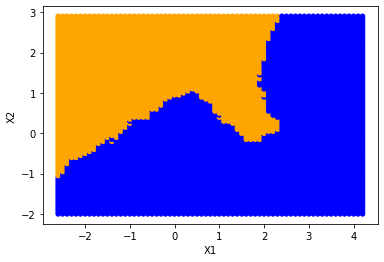

In [22]:
#scatter plot
test_data.plot.scatter(x='X1',y='X2',c=col_vec_test_15NN)

### --- the end ---